<a href="https://colab.research.google.com/github/Dpgofast/Lambda-projects/blob/master/revisionStorytelling_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Total yearly export profit of each state 2008- 2018  
- How is a state effected during an election year?
- How is a state affected when a running candidate is from that state?
- What is the overall export rate during an election year?
- #TODO

In [0]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns 

## Data taken from U.S census data sheets [here](https://www.census.gov/foreign-trade/statistics/state/origin_movement/index.html)

## Complied from 11 xls formated sheets and cleaned of un-needed information resulting in a single workable Csv file

In [0]:
 
full= pd.read_csv('https://raw.githubusercontent.com/Dpgofast/Lambda-projects/master/fullset_project08-18%20-%20Sheet1.csv')

In [0]:
full.head()

,State,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,"12,171.9","8,805.3","11,204.1","13,196.4","14,849.5","14,383.0","14,603.7","14,430.2","15,236.4","16,197.4","16,494.6"
1,Alaska,"2,892.2","2,533.6","3,291.6","4,071.7","3,473.1","3,664.0","4,108.0","3,960.1","3,533.4","3,958.7","3,913.9"
2,Arizona,"14,889.9","10,331.3","11,525.5","13,180.1","13,815.3","14,385.7","15,366.0","17,031.9","16,312.7","15,406.3","16,531.6"
3,Arkansas,"4,274.1","3,734.7","3,689.7","4,263.1","5,532.4","5,355.1","4,871.5","4,339.6","4,075.7","4,585.9","5,054.0"
4,California,"111,252.1","86,497.8","104,526.2","117,923.9","121,142.9","122,957.1","128,985.9","124,984.7","119,954.7","126,458.0","133,469.4"


In [0]:
full.isna().sum().sum()
#no Null values found 

In [0]:
full

,State,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,"12,171.9","8,805.3","11,204.1","13,196.4","14,849.5","14,383.0","14,603.7","14,430.2","15,236.4","16,197.4","16,494.6"
1,Alaska,"2,892.2","2,533.6","3,291.6","4,071.7","3,473.1","3,664.0","4,108.0","3,960.1","3,533.4","3,958.7","3,913.9"
2,Arizona,"14,889.9","10,331.3","11,525.5","13,180.1","13,815.3","14,385.7","15,366.0","17,031.9","16,312.7","15,406.3","16,531.6"
3,Arkansas,"4,274.1","3,734.7","3,689.7","4,263.1","5,532.4","5,355.1","4,871.5","4,339.6","4,075.7","4,585.9","5,054.0"
4,California,"111,252.1","86,497.8","104,526.2","117,923.9","121,142.9","122,957.1","128,985.9","124,984.7","119,954.7","126,458.0","133,469.4"
5,Colorado,"5,941.0","4,327.7","4,873.5","5,435.8","6,089.4","6,491.7","6,211.3","6,097.3","5,628.2","5,954.4","6,360.1"
6,Connecticut,"11,424.4","10,065.5","11,732.0","11,963.6","11,945.0","12,526.0","11,990.8","11,363.2","10,705.9","10,856.7","12,811.4"
7,Delaware,"3,734.2","3,186.5","3,774.4","4,207.8","4,001.7","4,085.6","3,864.4","3,808.2","3,285.7","3,320.8","3,382.1"
8,Florida,"41,322.5","34,034.5","40,265.8","47,899.3","49,752.5","45,537.9","43,366.8","40,649.9","38,641.7","39,725.7","42,597.0"
9,Georgia,"20,928.6","17,453.8","20,792.5","25,667.4","26,444.7","27,817.4","29,245.9","28,777.9","26,787.3","27,399.4","30,298.9"


In [0]:
full.shape



# Data loaded 
Checked for nan values, none found 
 
 53,12 Data Frame. 
 
 All US states accounted for including D.C, Puerto rico, and virgin islands. 
 ## Next steps:
  - Find all Presidential candidates for years 2008 - 2018
  - List respective  home state for each candidate 
  - Graph state export sales years prior to campaign
  - Graph state export sales during the campaign 
  - Graph state export sales if candidate is elected
  - Graph state export sales if candidate is not elected 
  - Interpret correlation: 
      -- 
      - Did candidate improve export sales?
      - Did candidate negatively effect sales?
      - Is there no relation at all?
  - What effect does an election have on the overall economy?

# Major party candidates(Rep., or Dem ) Win = '*'
**Presidential Candidates 2008 - Home State  **
- Barack Obama - Illinois *
- John McCain - Arizona 

**Presidential candidates 2012 - Home State**
- Barack Obama - Illinois *
- Mitt Romney - Massachusetts

**Presidential candidates 2016 - Home State**
- Hillary Clinton - New York 
- Donald Trump - New York *

## In order to get a baseline for the respective states profiled in this project I will start with a line graph for each state showing total export profits for the whole period of focus. (10 years) 
### The states in focus for this period are the home states of each candidate. Because of the fact that in both 2008 and 2012 elections Barack Obama is present there will be one example graph for illinois. Also in the period of 2016 Both Donald Trump and Hillary Clinton are from New York, So only one graphic is provided for the period overview.  

#### List of states in focus:
- Illinois
- Arizona
- Massachusetts
- New York 

In [0]:
ill = pd.DataFrame(full.loc[12])

In [0]:
ill.drop('State',inplace=True)

In [245]:
ill.head()

,12
2008,"40,517.4"
2009,"30,464.0"
2010,"36,249.8"
2011,"48,218.0"
2012,"51,835.7"


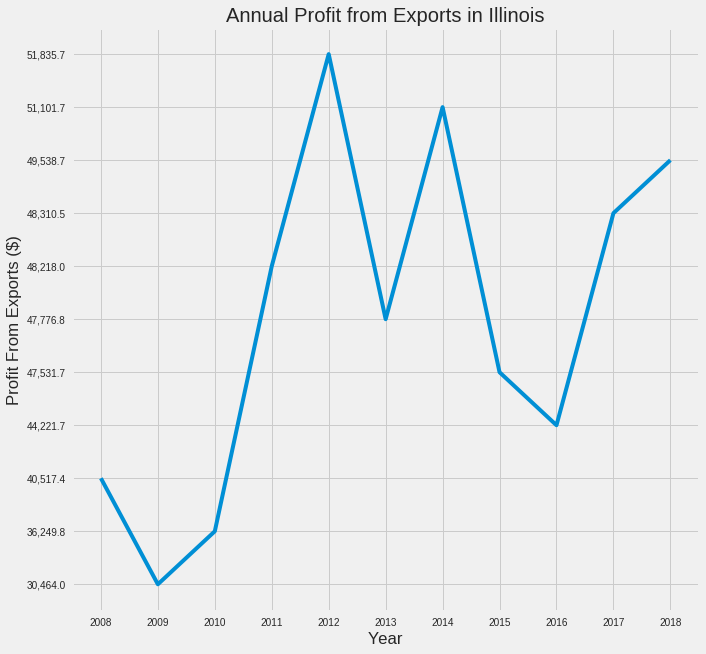

In [378]:
plt.figure(figsize=(10,10))
plt.plot(ill)
plt.ylabel('Profit From Exports ($)')
plt.xlabel('Year')
plt.title('Annual Profit from Exports in Illinois')
plt.style.use('fivethirtyeight')
plt.show()

In [0]:
ariz = full.loc[2]

In [0]:
ariz.drop('State',inplace=True)


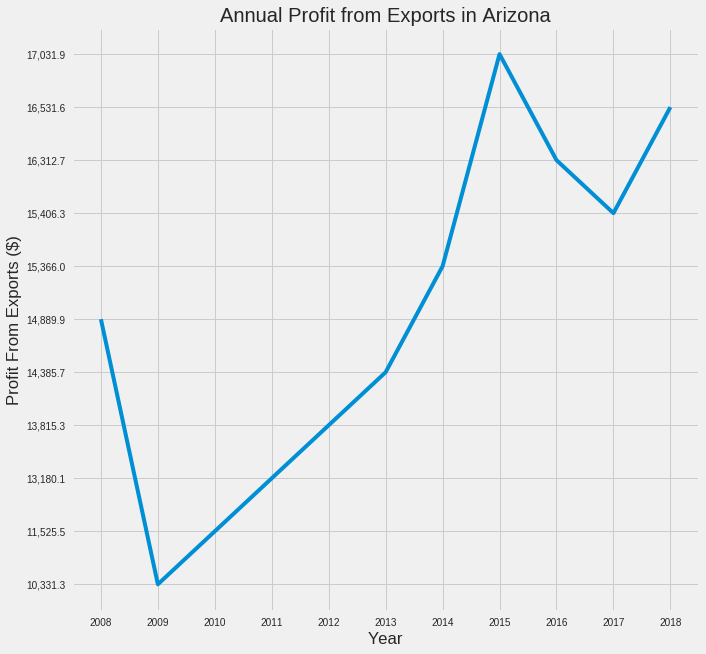

In [379]:
plt.figure(figsize=(10,10))
plt.plot(ariz)
plt.ylabel('Profit From Exports ($)')
plt.xlabel('Year')
plt.title('Annual Profit from Exports in Arizona')
plt.style.use('fivethirtyeight')
plt.show()

In [0]:
mass = full.loc[20]

In [0]:
mass.drop('State',inplace=True)


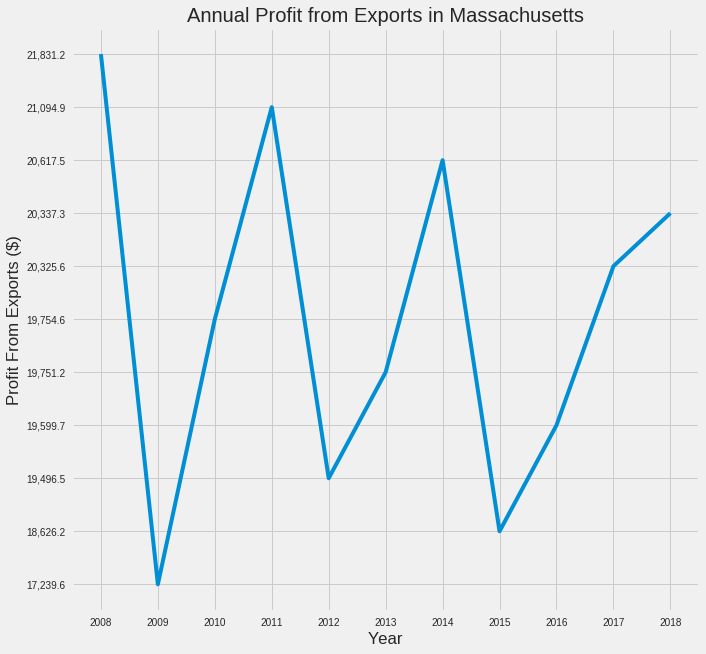

In [380]:
plt.figure(figsize=(10,10))
plt.plot(mass)
plt.ylabel('Profit From Exports ($)')
plt.xlabel('Year')
plt.title('Annual Profit from Exports in Massachusetts')
plt.style.use('fivethirtyeight')
plt.show()

In [0]:
newyrk = pd.DataFrame(full.loc[31])

In [285]:
newyrk.head()

,31
State,New York
2008,"63,295.7"
2009,"41,732.5"
2010,"49,251.7"
2011,"62,719.4"


In [0]:
newyrk.drop('State', inplace = True )

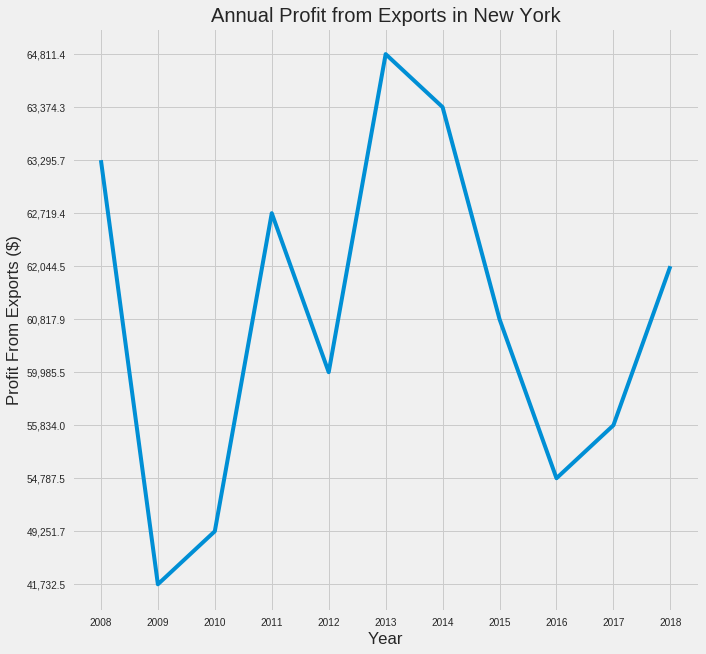

In [381]:
plt.figure(figsize=(10,10))
plt.plot(newyrk)
plt.ylabel('Profit From Exports ($)')
plt.xlabel('Year')
plt.title('Annual Profit from Exports in New York')
plt.style.use('fivethirtyeight')
plt.show()

In [0]:
canstates= pd.concat([ill,ariz,mass,newyrk],axis=1)
canstates.head()
column_key= {12:'Illinois',2:'Arizona',20:'Massachusetts',31:'New York'}
canstates.rename(columns= column_key, inplace= True)

In [346]:
canstates

,Illinois,Arizona,Massachusetts,New York
2008,"40,517.4","14,889.9","21,831.2","63,295.7"
2009,"30,464.0","10,331.3","17,239.6","41,732.5"
2010,"36,249.8","11,525.5","19,754.6","49,251.7"
2011,"48,218.0","13,180.1","21,094.9","62,719.4"
2012,"51,835.7","13,815.3","19,496.5","59,985.5"
2013,"47,776.8","14,385.7","19,751.2","64,811.4"
2014,"51,101.7","15,366.0","20,617.5","63,374.3"
2015,"47,531.7","17,031.9","18,626.2","60,817.9"
2016,"44,221.7","16,312.7","19,599.7","54,787.5"
2017,"48,310.5","15,406.3","20,325.6","55,834.0"


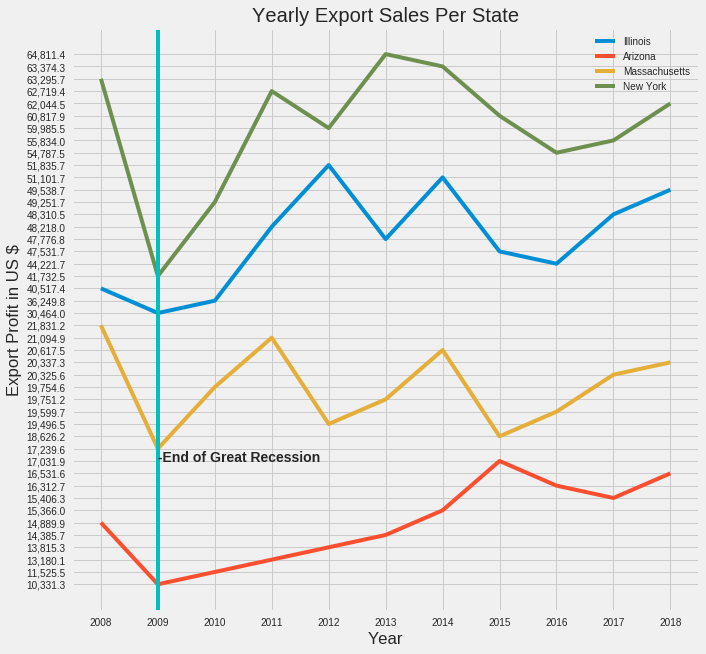

In [422]:

plt.figure(figsize=(10,10))
plt.plot(canstates);
plt.title('Yearly Export Sales Per State')
plt.ylabel('Export Profit in US $')
plt.xlabel('Year')
plt.axvline(2009,color='c',label='recession_end')
plt.legend(canstates);
plt.text(x=2009,y=10,s=('-End of Great Recession'),fontweight= 'bold');



# placeholder/ ToDo
**with the overview done it may be time to break into the respective states with results of election / economy. may need to input aditional dates because of the recession time frame (2007-2009), Obama's consecutive terms along with Trump and Hillary having the same home state. hard to find conclusion with 4 lines and 10 years.... with 4 days left it is possible to import and clean more data if its available. maybe 20 years? 1998 to2018.**

